In [39]:
import numpy as np
from itertools import combinations
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import seaborn as sns

In [40]:
topo_file = "RACIPE_output/a_new_network.topo"
topo_in_df = pd.read_csv(topo_file, sep='\t')

## Topo to Adjacency matrix

In [41]:
# Generates a Adjacency matrix from a topo file

def Topo_adj(df): 

    """
    OUTPUT:
    - A list with two elements:
        - adj: adjacency matrix
        - nodes: list of nodes
    INPUT:
    - df: pandas dataframe with columns ['Source', 'Target', 'Type'] i.e. a topology file read with pd.read_csv
    """
    
    # print("df:", type(df.iloc[3,2]))
    n=len(set(df['Source'])) 
    adj = pd.DataFrame([[0]*n]*n)
    adj.columns=set(df.loc[:,'Source'])

    adj.index=set(df.loc[:,'Source'])

    for i in range(len(df)): 
        if int(df.iloc[i,2]) == 1:
            adj.loc[df.iloc[i,0] , df.iloc[i,1] ] = 1

        elif int(df.iloc[i,2]) == 2:
            adj.loc[df.iloc[i,0] , df.iloc[i,1] ] = -1


    nodes = adj.index

    return [adj, nodes]

In [42]:
adjacecny_matrix = Topo_adj(topo_in_df)
print("No of nodes:" ,len(adjacecny_matrix[1]))
print("These are:", adjacecny_matrix[1]) 
print("The adjacency matrix is:")
adjacecny_matrix[0]

No of nodes: 24
These are: Index(['Foxa1', 'ERa66', 'noxROS', 'LIN28', 'SNAIL', 'OCT4', 'Gata3', 'mtROS',
       'Nrf2', 'AMPK', 'let7', 'RKIP', 'miR145', 'HIF1', 'ERa36', 'ZEB',
       'CDH1', 'Pgr', 'miR34', 'PD_L1', 'miR200', 'SLUG', 'np63', 'BACH1'],
      dtype='object')
The adjacency matrix is:


,Foxa1,ERa66,noxROS,LIN28,SNAIL,OCT4,Gata3,mtROS,Nrf2,AMPK,...,ERa36,ZEB,CDH1,Pgr,miR34,PD_L1,miR200,SLUG,np63,BACH1
Foxa1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-1,0,0
ERa66,0,1,0,0,0,0,1,0,0,0,...,-1,0,-1,1,0,-1,0,-1,0,0
noxROS,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
LIN28,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SNAIL,0,0,0,0,-1,0,0,0,0,0,...,0,1,0,0,-1,0,-1,-1,0,0
OCT4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gata3,1,1,0,0,0,0,0,0,0,0,...,-1,-1,1,1,0,0,0,0,0,0
mtROS,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Nrf2,0,0,0,0,-1,0,0,0,0,0,...,0,-1,0,-1,0,1,0,0,0,0
AMPK,0,0,-1,0,-1,0,0,-1,0,-1,...,0,-1,0,0,0,0,1,0,0,-1


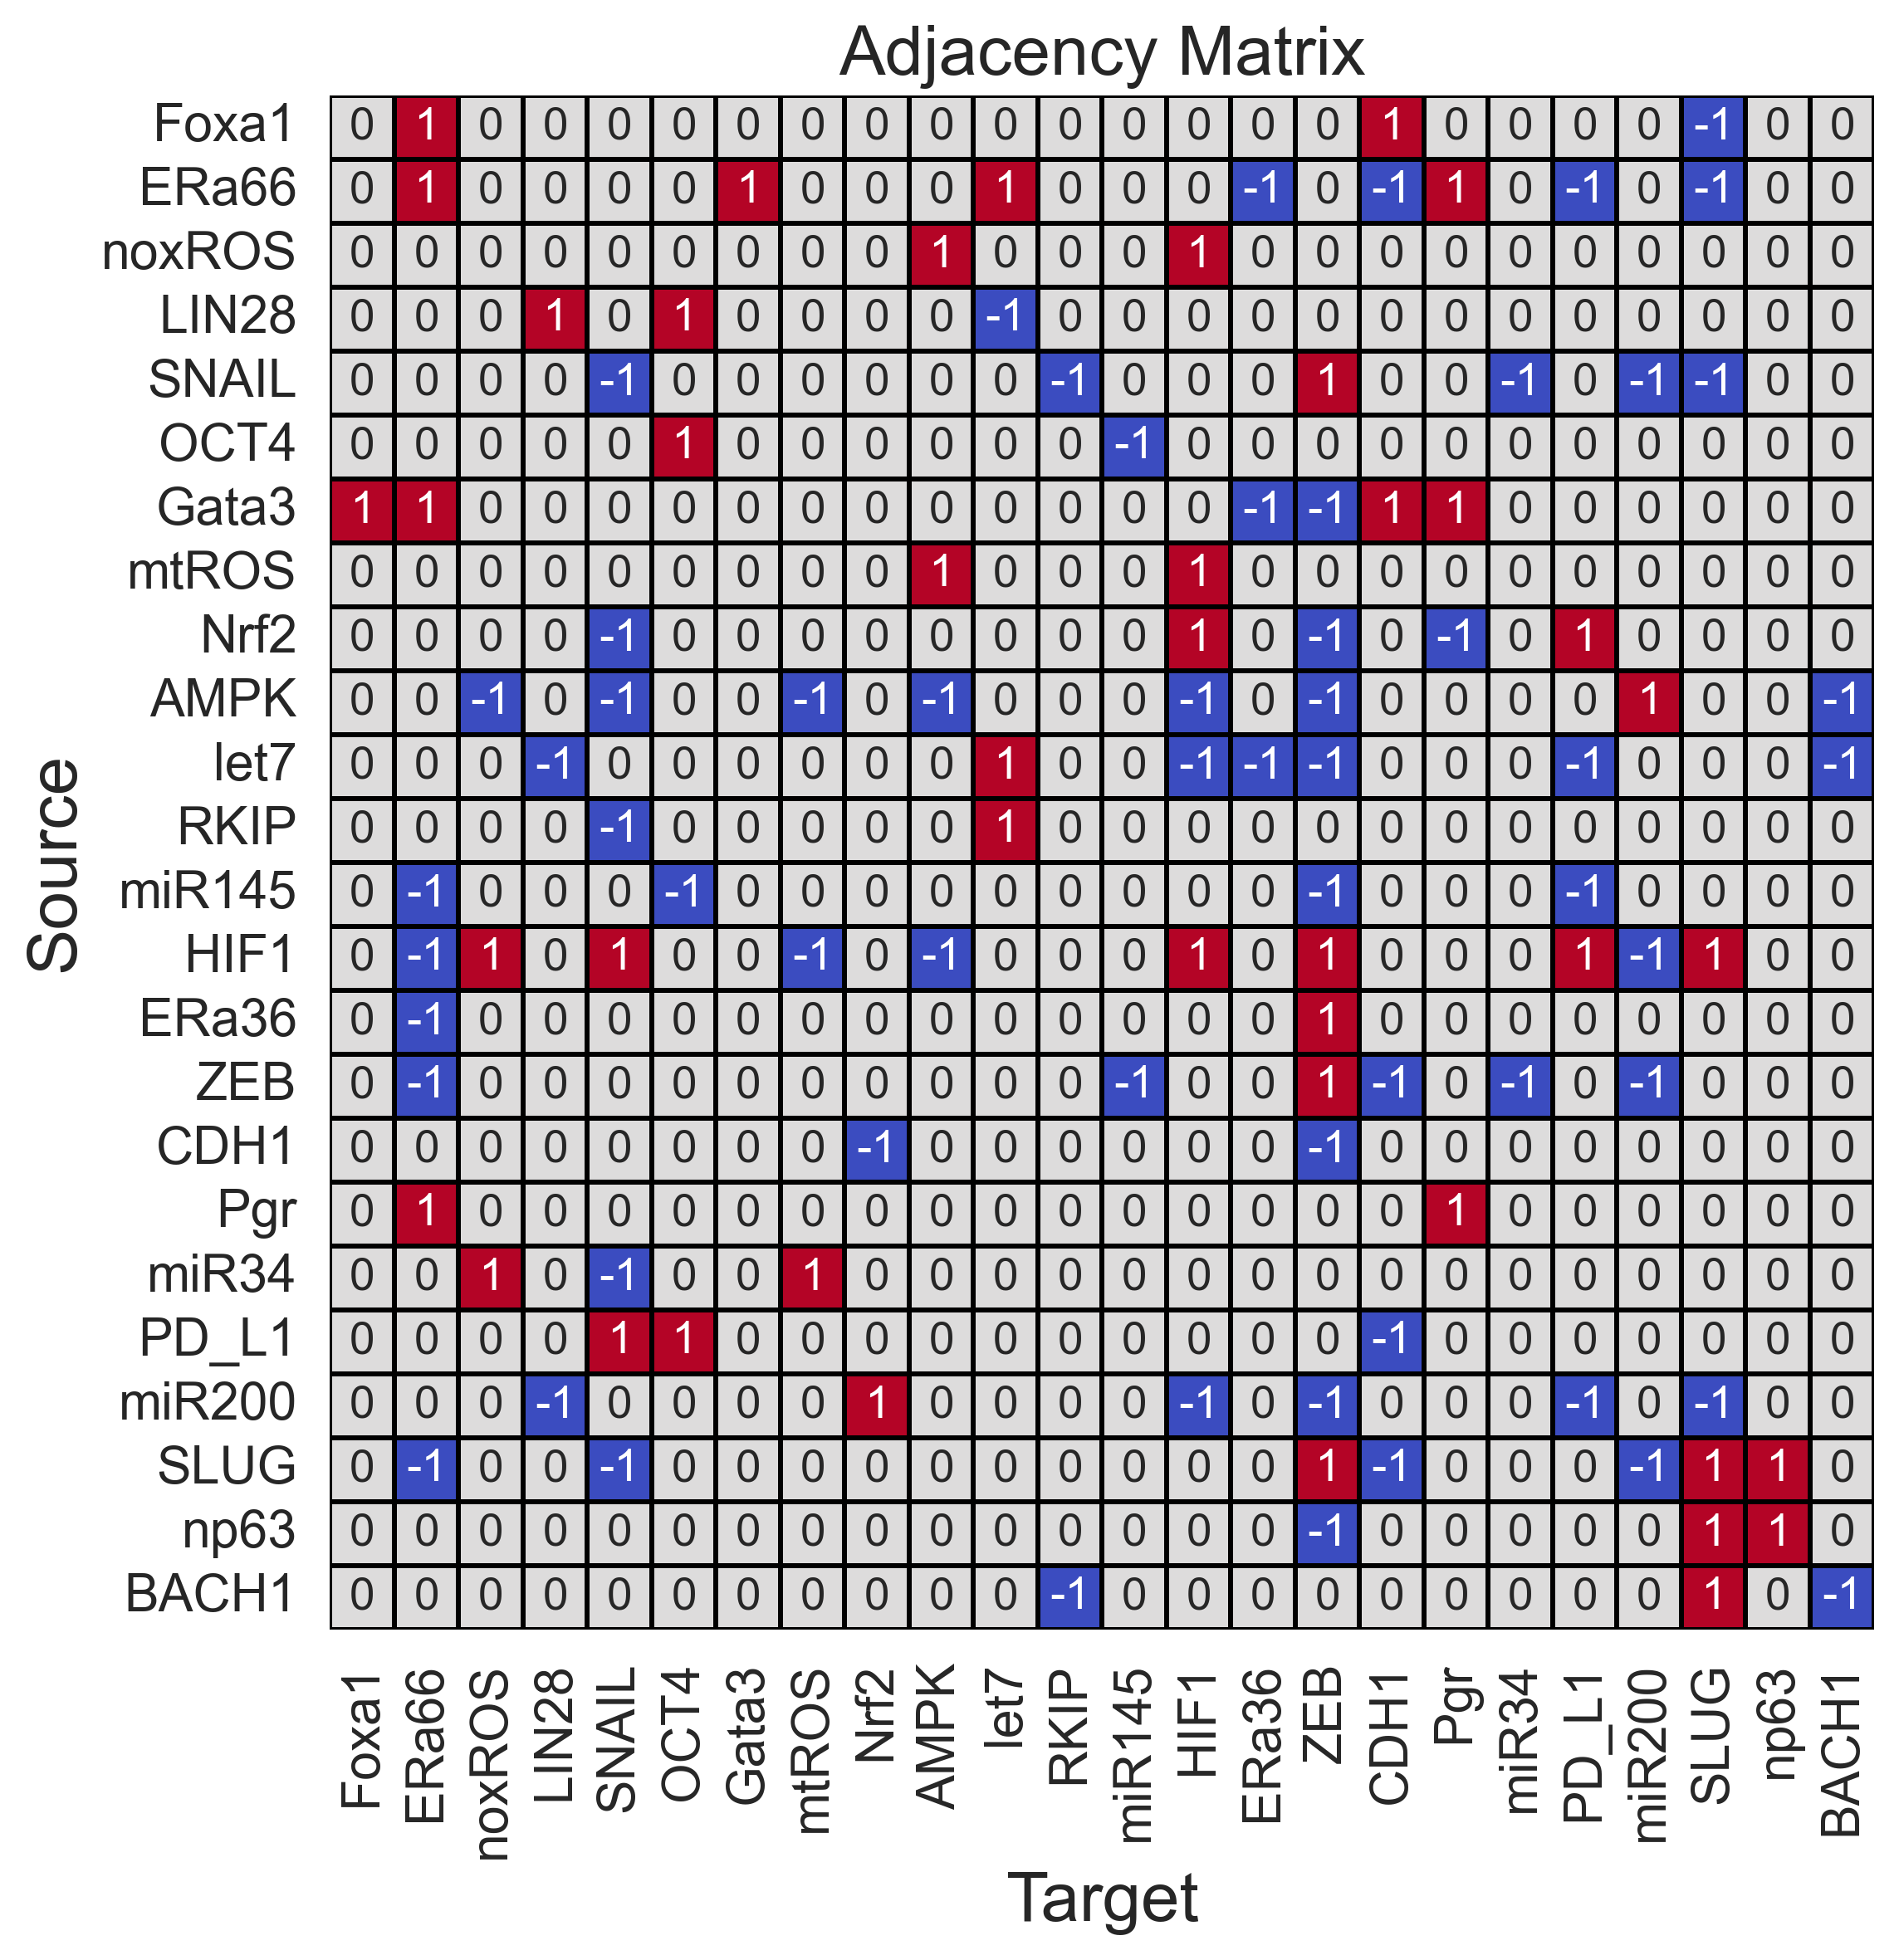

In [ ]:
plt.figure(figsize=(8, 8), dpi = 300)
sns.set(font_scale=1.1)
# plt.rcParams['figure.dpi']= 1000

with plt.style.context({
                        'xtick.labelsize':16,
                        'ytick.labelsize':16}):
        sns.heatmap(adjacecny_matrix[0], annot = True, cmap ='coolwarm',
                       linecolor ='black', linewidths = 1, cbar = False)


plt.tick_params(axis='both', which='major', labelsize=13)
# plt.savefig("Topo_adjacency_matrix.png", dpi=300)
plt.title("Adjacency Matrix", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Target", fontsize=20)
plt.ylabel("Source", fontsize=20)
plt.show()

## Adjacency Matrix to Influence Matrix

In [44]:
def ComputePowerMatrix(mat, power):
    res = np.copy(mat)
    if power == 1:
        return res
    for i in range(2, power + 1):
        res = np.dot(res, mat)
    return res

In [45]:
def influence_matrix(intmat, nodes, lmax=10):
    # Copy intmat to intmax and replace -1 with 1
    intmax = np.where(intmat == -1, 1, intmat)

    # Initialize result matrix
    res = np.zeros_like(intmat, dtype=float)

    # Calculate the influence matrix over lmax layers
    for l in range(1, lmax + 1):
        intM = ComputePowerMatrix(intmat, l)
        maxM = ComputePowerMatrix(intmax, l)

        # Avoid division by zero and handle NaNs
        with np.errstate(divide='ignore', invalid='ignore'):
            r1 = np.divide(intM, maxM)
            r1[np.isnan(r1)] = intM[np.isnan(r1)]  # Replace NaNs from division by zero

        res += r1

    # Average the results over all layers
    res /= lmax

    # Convert result to a pandas DataFrame for labeling rows and columns with nodes
    influence_mat = pd.DataFrame(res, index=nodes, columns=nodes)

    return influence_mat

In [46]:
infl_matrix = influence_matrix(adjacecny_matrix[0], adjacecny_matrix[1], lmax = 10)
infl_matrix

,Foxa1,ERa66,noxROS,LIN28,SNAIL,OCT4,Gata3,mtROS,Nrf2,AMPK,...,ERa36,ZEB,CDH1,Pgr,miR34,PD_L1,miR200,SLUG,np63,BACH1
Foxa1,0.562226,0.609540,-0.073545,-0.458943,0.076672,-0.507678,0.588534,0.196538,-0.051104,0.188431,...,-0.611214,-0.378921,0.304275,0.531897,0.215322,-0.512808,0.401599,-0.595505,-0.597235,-0.342535
ERa66,0.647235,0.594342,-0.133847,-0.575452,-0.074416,-0.604909,0.673407,0.292048,0.114252,0.225979,...,-0.702001,-0.378827,0.130441,0.606584,0.268188,-0.597324,0.416427,-0.558690,-0.559331,-0.378498
noxROS,-0.203510,-0.213822,0.053493,0.099720,0.032137,0.205058,-0.209268,-0.087329,-0.020893,-0.006839,...,0.232104,0.090322,-0.065991,-0.204178,-0.064511,0.197375,-0.086951,0.174217,0.182801,0.014315
LIN28,-0.282673,-0.330491,0.194800,0.751011,0.226186,0.804086,-0.309125,-0.359377,-0.039133,-0.244385,...,0.564450,0.549356,-0.330809,-0.262490,-0.455529,0.568899,-0.441498,0.345478,0.340150,0.343697
SNAIL,-0.036634,-0.042887,-0.085506,0.213638,0.012806,0.203736,-0.040057,-0.168289,-0.101287,-0.098450,...,0.085867,0.194591,-0.053818,0.007717,-0.211775,0.168415,-0.158383,-0.069048,-0.105579,0.156874
OCT4,0.263701,0.279335,-0.188325,-0.031428,0.151746,0.474097,0.272534,-0.169123,0.052765,-0.059357,...,-0.305681,0.243968,-0.131746,0.278308,-0.251165,0.100376,-0.158405,-0.220379,-0.232111,-0.162536
Gata3,0.676517,0.630427,0.064812,-0.530611,-0.053096,-0.562831,0.606424,0.359857,-0.059823,0.210432,...,-0.735262,-0.557879,0.327121,0.657624,0.446632,-0.555457,0.490731,-0.519897,-0.516889,-0.380449
mtROS,-0.203510,-0.213822,0.053493,0.099720,0.032137,0.205058,-0.209268,-0.087329,-0.020893,-0.006839,...,0.232104,0.090322,-0.065991,-0.204178,-0.064511,0.197375,-0.086951,0.174217,0.182801,0.014315
Nrf2,-0.161240,-0.174536,0.212480,0.069605,-0.020994,0.220987,-0.168638,-0.109601,-0.013085,-0.108941,...,0.165640,-0.046460,-0.049674,-0.366240,0.025577,0.298299,-0.081775,0.194674,0.205425,0.133600
AMPK,0.264134,0.282058,-0.124122,-0.337480,-0.127183,-0.321506,0.274135,0.101659,0.141690,-0.030637,...,-0.302474,-0.323944,0.224180,0.175915,0.243987,-0.291197,0.293379,-0.186772,-0.189301,-0.122027


## Group/ Teams Strength Calculation

In [47]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
# import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

In [49]:
def group_strength(topo_file, path_length=10, plot_out=True, get_teams=True, log_df=None, node_label_size=None):

    """
    Args:
    topo_df: pandas DataFrame with columns ['Source', 'Target', 'Type'] i.e. a topology file read with pd.read_csv
    pathLength: int, default 10, the maximum path length to consider for influence calculation

    Returns:
    A list containing the following elements:
    - g11: float, average influence of group 1 on itself (intragroup strength of Team 1)
    - g22: float, average influence of group 2 on itself (intragroup strength of Team 2)
    - g12: float, average influence of group 1 on group 2 (intergroup strength from Team 1 to Team 2)
    - g21: float, average influence of group 2 on group 1 (intergroup strength from Team 2 to Team 1)
    - GAll: float, overall strength of the network (average of the absolute values of g11, g22, g12, and g21)
    """
    
    # Load and process topology file
    x= Topo_adj(topo_file)
    intmat, nodes = x[0], x[1]

    # Compute Influence Matrix
    infl_mat = influence_matrix(intmat, nodes, path_length)

    # Binarize influence matrix
    df = np.where(infl_mat > 0, 1, -1)
    df1 = np.concatenate((df, df.T), axis= 1)
    distances = pdist(df1, metric="euclidean")  # Pairwise Euclidean distances

    # Hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="complete")
    clust = hc.fit_predict(df1)

    linkage_matrix = linkage(distances, method="complete")
    dendrogram_data = dendrogram(linkage_matrix, no_plot=True)
    order = dendrogram_data['leaves']
    print(order)

    # print(clust)
    # Assign nodes to clusters
    nodes = np.array(nodes)
    print(type(nodes))
    g1 = sorted(nodes[clust == 0])
    print("Team 1:", g1)
    g2 = sorted(nodes[clust == 1])
    print("Team 2:", g2)
    
    # Compute group strengths
    df_mat = pd.DataFrame(infl_mat, index=nodes, columns=nodes)
    g11 = np.mean(infl_mat.loc[g1, g1].values)
    g22 = np.mean(infl_mat.loc[g2, g2].values)
    g12 = np.mean(infl_mat.loc[g1, g2].values)
    g21 = np.mean(infl_mat.loc[g2, g1].values)
    g_all = [g11, g22, g12, g21, np.abs([g11, g22, g12, g21]).mean()]
    list_r = [g_all, g1, g2, order]
    return list_r

In [50]:
results_orig = group_strength(topo_in_df, path_length=10)
g1 = results_orig[1]
g2 = results_orig[2]
ordered_g1_g2 = results_orig[3]
print("Ordered nodes:", ordered_g1_g2)
print("Strength of original network:", results_orig[0][4])

[5, 4, 15, 22, 2, 21, 19, 3, 23, 13, 14, 17, 1, 10, 0, 6, 16, 20, 9, 11, 12, 18, 7, 8]
<class 'numpy.ndarray'>
Team 1: ['AMPK', 'CDH1', 'ERa66', 'Foxa1', 'Gata3', 'Nrf2', 'Pgr', 'RKIP', 'let7', 'miR145', 'miR200', 'miR34', 'mtROS']
Team 2: ['BACH1', 'ERa36', 'HIF1', 'LIN28', 'OCT4', 'PD_L1', 'SLUG', 'SNAIL', 'ZEB', 'noxROS', 'np63']
Ordered nodes: [5, 4, 15, 22, 2, 21, 19, 3, 23, 13, 14, 17, 1, 10, 0, 6, 16, 20, 9, 11, 12, 18, 7, 8]
Strength of original network: 0.22106189100154594


In [51]:
reverse_order = ordered_g1_g2.copy()
reverse_order.reverse()
print("correect order:", ordered_g1_g2)
print("Reverse order:", reverse_order)

correect order: [5, 4, 15, 22, 2, 21, 19, 3, 23, 13, 14, 17, 1, 10, 0, 6, 16, 20, 9, 11, 12, 18, 7, 8]
Reverse order: [8, 7, 18, 12, 11, 9, 20, 16, 6, 0, 10, 1, 17, 14, 13, 23, 3, 19, 21, 2, 22, 15, 4, 5]


In [52]:
# Reorder the rows and columns of infl_matrix
ordered_infl_matrix = infl_matrix.iloc[ordered_g1_g2, reverse_order]

# Display the reordered influence matrix
ordered_infl_matrix

,Nrf2,mtROS,miR34,miR145,RKIP,AMPK,miR200,CDH1,Gata3,Foxa1,...,HIF1,BACH1,LIN28,PD_L1,SLUG,noxROS,np63,ZEB,SNAIL,OCT4
OCT4,0.052765,-0.169123,-0.251165,-0.485988,-0.118286,-0.059357,-0.158405,-0.131746,0.272534,0.263701,...,-0.025797,-0.162536,-0.031428,0.100376,-0.220379,-0.188325,-0.232111,0.243968,0.151746,0.474097
SNAIL,-0.101287,-0.168289,-0.211775,-0.207671,-0.123523,-0.098450,-0.158383,-0.053818,-0.040057,-0.036634,...,0.119777,0.156874,0.213638,0.168415,-0.069048,-0.085506,-0.105579,0.194591,0.012806,0.203736
ZEB,-0.050896,-0.337153,-0.503558,-0.605661,-0.201409,-0.170882,-0.498463,-0.300851,-0.395939,-0.377840,...,0.262532,0.274681,0.516621,0.398010,0.336101,-0.103684,0.343717,0.487294,0.180297,0.555428
np63,0.006504,0.134697,0.193477,0.167955,0.184803,0.047817,-0.015213,-0.025195,-0.076508,-0.072272,...,0.033538,0.008863,0.019953,0.008184,0.350885,0.161984,0.481609,-0.155007,-0.189246,-0.128684
noxROS,-0.020893,-0.087329,-0.064511,-0.098583,-0.018675,-0.006839,-0.086951,-0.065991,-0.209268,-0.203510,...,0.148360,0.014315,0.099720,0.197375,0.174217,0.053493,0.182801,0.090322,0.032137,0.205058
SLUG,-0.017866,-0.149571,-0.155555,-0.357351,0.069354,-0.174687,-0.358603,-0.293206,-0.473815,-0.455840,...,0.286267,0.271436,0.415389,0.381469,0.484564,0.069519,0.597305,0.344009,-0.092206,0.382213
PD_L1,0.001668,-0.209699,-0.256600,-0.377185,-0.111394,-0.119432,-0.213558,-0.215715,-0.056375,-0.049742,...,0.154480,0.164482,0.242319,0.212295,-0.031128,-0.085644,-0.070777,0.237182,0.104538,0.554874
LIN28,-0.039133,-0.359377,-0.455529,-0.658236,-0.295266,-0.244385,-0.441498,-0.330809,-0.309125,-0.282673,...,0.473593,0.343697,0.751011,0.568899,0.345478,0.194800,0.340150,0.549356,0.226186,0.804086
BACH1,-0.021831,-0.133917,-0.141037,-0.281282,-0.063787,-0.152203,-0.260624,-0.207457,-0.317248,-0.302990,...,0.221898,0.126869,0.298332,0.277052,0.300646,0.044616,0.328862,0.270783,0.014447,0.285522
HIF1,-0.162782,-0.265917,-0.331365,-0.458917,-0.206622,-0.179004,-0.420804,-0.225515,-0.469378,-0.453177,...,0.326358,0.238313,0.469620,0.493714,0.387819,0.229141,0.396153,0.442340,0.186079,0.529152


In [53]:
ordered_infl_matrix.index

Index(['OCT4', 'SNAIL', 'ZEB', 'np63', 'noxROS', 'SLUG', 'PD_L1', 'LIN28',
       'BACH1', 'HIF1', 'ERa36', 'Pgr', 'ERa66', 'let7', 'Foxa1', 'Gata3',
       'CDH1', 'miR200', 'AMPK', 'RKIP', 'miR145', 'miR34', 'mtROS', 'Nrf2'],
      dtype='object')

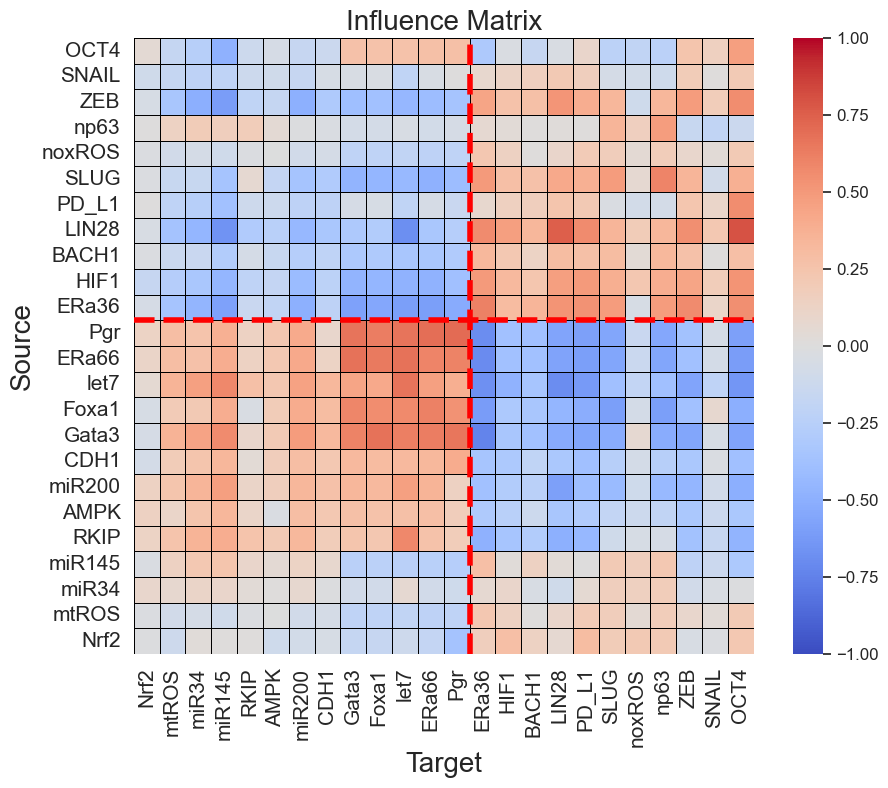

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_infl_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black', vmax=1, vmin=-1)
plt.title('Influence Matrix', fontsize=20)
plt.axvline(x= 13, color='red', linestyle='--', linewidth=4)
plt.axhline(y= 11, color='red', linestyle='--', linewidth=4)
plt.xlabel("Target", fontsize=20)
plt.ylabel("Source", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Randon Network Analysis

In [55]:
# making a list of all the topo files of interest.
# "/home/csb/Ritesh/RACIPE_analysis/rough_network/500_random_network_simulations/a_new_networ/k"
file_list = glob.glob("random_networks/*.topo")
file_list = [path.replace("\\", "/") for path in file_list]
len(file_list)

501

In [56]:
list_strength_full_net = []
df_strength = pd.DataFrame(columns= ["Network_strength"])

for file in file_list:

        df_topo = pd.read_csv(file, sep="\t", dtype=str)
        print(f"Processing {os.path.basename(file)}")
        strength = group_strength(df_topo, path_length=10)
        df_strength.loc[os.path.basename(file),"Network_strength"] = strength[0][4]
        list_strength_full_net.append(strength[0][4])
        print(f"Strength of {os.path.basename(file)} is {strength[0][4]}")

Processing random_topo_101.topo
[4, 19, 5, 12, 1, 22, 15, 20, 0, 21, 8, 16, 14, 3, 13, 11, 7, 18, 10, 9, 23, 2, 6, 17]
<class 'numpy.ndarray'>
Team 1: ['AMPK', 'BACH1', 'CDH1', 'ERa36', 'Foxa1', 'Gata3', 'HIF1', 'LIN28', 'Nrf2', 'Pgr', 'RKIP', 'SLUG', 'let7', 'miR34', 'mtROS', 'noxROS']
Team 2: ['ERa66', 'OCT4', 'PD_L1', 'SNAIL', 'ZEB', 'miR145', 'miR200', 'np63']
Strength of random_topo_101.topo is 0.018064438372989794
Processing random_topo_414.topo
[11, 20, 8, 16, 21, 22, 2, 9, 14, 19, 3, 23, 17, 5, 12, 10, 1, 0, 6, 7, 18, 13, 4, 15]
<class 'numpy.ndarray'>
Team 1: ['BACH1', 'ERa66', 'Foxa1', 'Gata3', 'HIF1', 'LIN28', 'OCT4', 'Pgr', 'SNAIL', 'ZEB', 'let7', 'miR145', 'miR34', 'mtROS']
Team 2: ['AMPK', 'CDH1', 'ERa36', 'Nrf2', 'PD_L1', 'RKIP', 'SLUG', 'miR200', 'noxROS', 'np63']
Strength of random_topo_414.topo is 0.021246353062971034
Processing random_topo_228.topo
[1, 0, 23, 4, 5, 19, 17, 6, 14, 13, 12, 8, 16, 10, 11, 18, 22, 3, 9, 2, 7, 15, 20, 21]
<class 'numpy.ndarray'>
Team 1: [

In [57]:
path_wt_topo = "random_networks/a_new_network.topo"
df_wt_topo = pd.read_csv(path_wt_topo, sep="\t", dtype=str)

strength_orig = group_strength(df_wt_topo, path_length=10)

[5, 4, 15, 22, 2, 21, 19, 3, 23, 13, 14, 17, 1, 10, 0, 6, 16, 20, 9, 11, 12, 18, 7, 8]
<class 'numpy.ndarray'>
Team 1: ['AMPK', 'CDH1', 'ERa66', 'Foxa1', 'Gata3', 'Nrf2', 'Pgr', 'RKIP', 'let7', 'miR145', 'miR200', 'miR34', 'mtROS']
Team 2: ['BACH1', 'ERa36', 'HIF1', 'LIN28', 'OCT4', 'PD_L1', 'SLUG', 'SNAIL', 'ZEB', 'noxROS', 'np63']


In [58]:
pwd()

'/Users/ritesh/Desktop/Multiaxis_github'

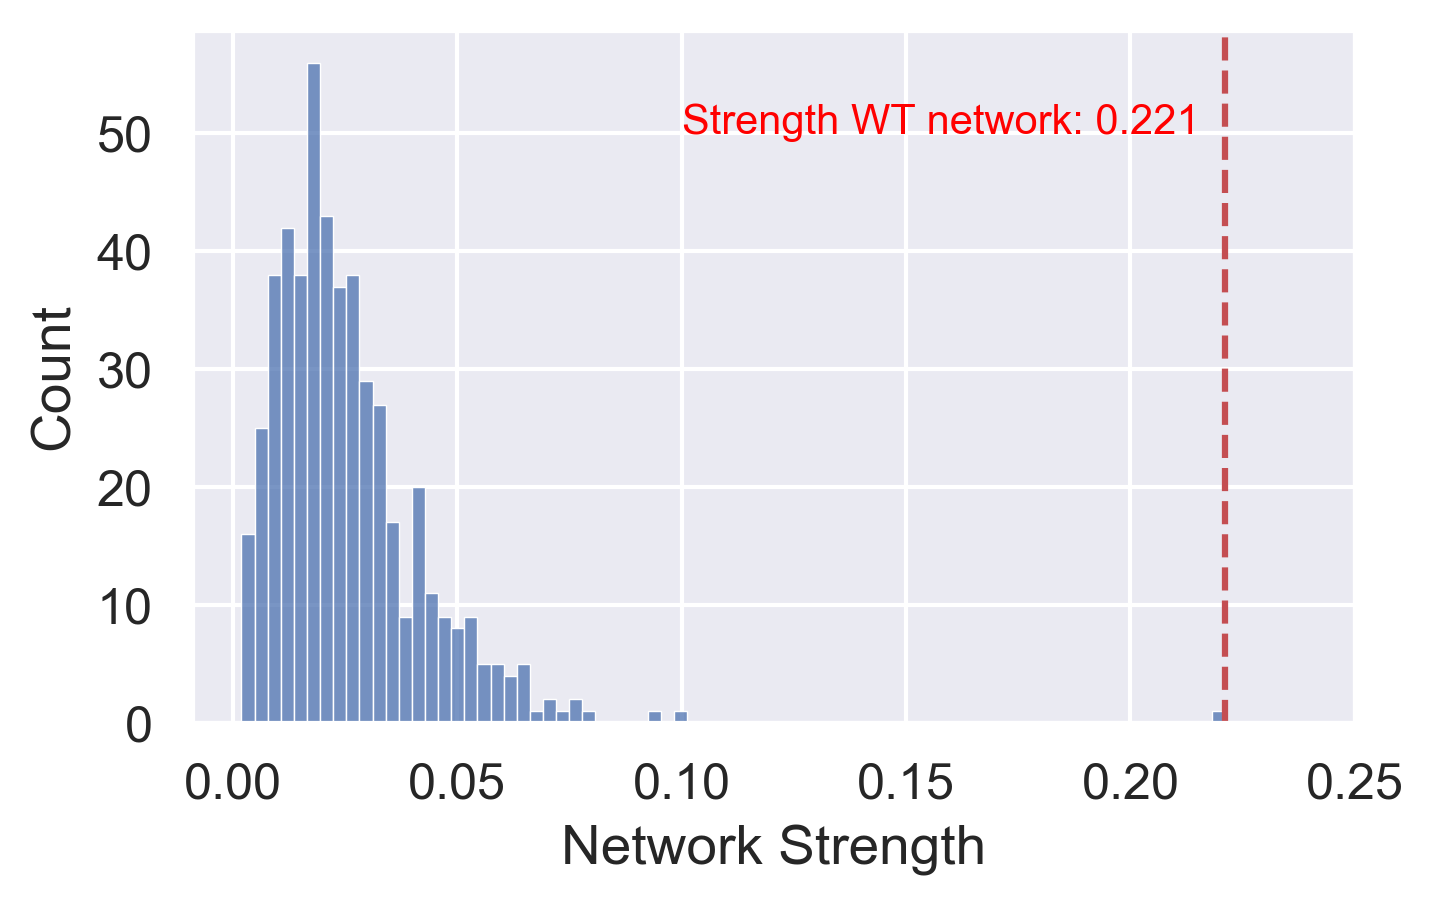

In [59]:
# Plotting the histogram of the network strength vs Frequency

plt.figure(figsize=(5, 3), dpi=300)
sns.histplot(list_strength_full_net, bins=75)
plt.xticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25])
plt.axvline(x= strength_orig[0][4], color='r', linestyle='--')
plt.xlabel("Network Strength")
plt.text(0.10, 50, f"Strength WT network: {strength_orig[0][4]:.3f}", rotation=0, color='red', fontsize=10)
plt.show()

In [60]:
df_strength[df_strength["Network_strength"] >= strength_orig[0][4]]

,Network_strength
a_new_network.topo,0.221062
